<a href="https://colab.research.google.com/github/AtheerMalki/Module04_ML/blob/main/ML9_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression
Use scikit-learn and build a logistic regression prediction model, with at least three input variables, for the Seattle Weather data or any data you choose.

Predict if it is going to rain tomorrow (true or false). Iterate on your feature set until you have a performance that you are happy with.

In [1]:
#import the packages that we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/russellromney/seattle-weather/master/seattleWeather_1948-2017.csv')

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [93]:
numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'intercept':[1.0] * numrows,
                             'yesterday':[0.0] * numrows,
                             'today':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows})

#sort columns for convience
seq = ['intercept',
       'yesterday',
       'today',
       'tomorrow']
regression_df = regression_df.reindex(columns=seq)

regression_df.head()

,intercept,yesterday,today,tomorrow
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [94]:
for i in range(0 , numrows):
    yesterday = df.iloc[i,1] #df[row_0, prcp]
    today = df.iloc[i+1,1] #df[row_1, prcp]
    tomorrow = df.iloc[(i+2),1] #df[row_2, prcp]
    regression_df.iat[i,1] = yesterday
    regression_df.iat[i,2] = today
    regression_df.iat[i,3] = tomorrow

regression_df = regression_df.dropna() #exclude any rows with missing data

regression_df.head()

,intercept,yesterday,today,tomorrow
0,1.0,0.47,0.59,0.42
1,1.0,0.59,0.42,0.31
2,1.0,0.42,0.31,0.17
3,1.0,0.31,0.17,0.44
4,1.0,0.17,0.44,0.41


In [70]:
#this makes a simple dataframe with a relationship that we can now plot
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25542 entries, 0 to 25548
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   intercept  25542 non-null  float64
 1   yesterday  25542 non-null  float64
 2   today      25542 non-null  float64
 3   tomorrow   25542 non-null  float64
dtypes: float64(4)
memory usage: 997.7 KB


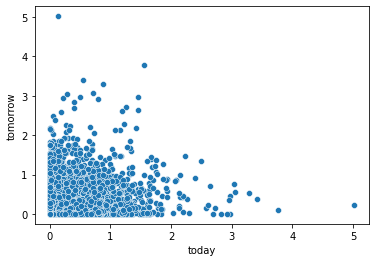

In [71]:
sns.scatterplot(x='today',y='tomorrow',data=regression_df)

In [95]:
regression_df.loc[regression_df.tomorrow > 0.0, "tomorrow"] = "Rain"
regression_df.loc[regression_df.tomorrow == 0.0, "tomorrow"] = "No Rain"
regression_df['tomorrow'].value_counts()

No Rain    14644
Rain       10898
Name: tomorrow, dtype: int64

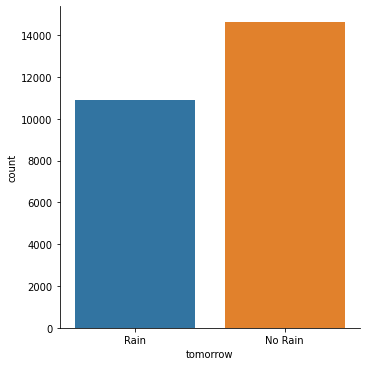

In [103]:
sns.catplot(x="tomorrow", kind="count", data=regression_df)

# Logistic Regression Model

In [104]:
X=regression_df[['yesterday', 'today']]
y=regression_df['tomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [106]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
predictions = lr.predict(X_test)

In [109]:
score = lr.score(X_test, y_test)
print(score)

0.6774193548387096


# New Section

Creating a basic linear model to best predict these values. Start with a slope and intercept values of 1 and then iterate through gradient descent.

In [ ]:
def gradientDescent(X, y, param, alpha, num_iters):
    """
       Performs gradient descent to learn param
    """
    for i in range(num_iters):
        y_hat = np.dot(X, param) # notice we use numpy here to efficently calculate the values
        param = param - alpha * np.dot(X.T, y_hat-y)
    return param

In this fucntion *param* is the initial guess of the values of the linear function and 
*X* is the vector of data values and y is the realization

In [ ]:
X = regression_df.iloc[0:200:,0:2]
y = regression_df.iloc[0:200:,2]
param = np.array([1,1])
alpha = 0.0001
num_iters = 1000

solution = gradientDescent(X, y, param, alpha, num_iters)
solution

array([0.08776347, 0.24539117])

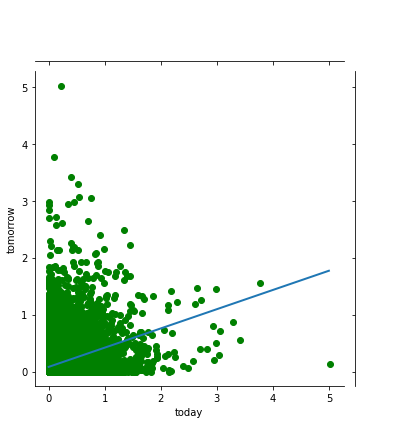

In [ ]:
grid = sns.JointGrid(x=regression_df.today,y=regression_df.tomorrow)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 5], [0.0811, 1.77], linewidth=2)

However, building models from scratch is hard! Lucky for us there is a very popular library that trains models for us!

In [ ]:
from sklearn import linear_model
#modify the data to work with this library
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)
y = y.reshape(regression_df.shape[0], 1)

In [ ]:
mymodel = linear_model.LinearRegression().fit(x,y)

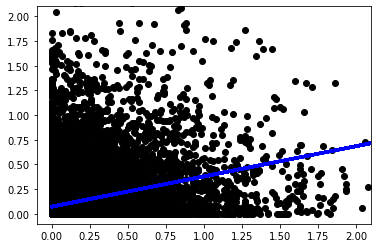

In [ ]:
plt.scatter(x, y,  color='black')
plt.plot(x, mymodel.predict(x), color='blue', linewidth=3)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [ ]:
# using the r2 (pronounced r squared) value we can get a basic measure of model quality
from sklearn.metrics import r2_score
r2_score(y,mymodel.predict(x))

0.09365441125285323

We can plot the difference between the predictions and the actual values for a visual estimate of performance. A perfect model would result in this being a straight line with a slope of 1. Notice how the model predicts only lower values, meaning that it tends to under predict the actual amount of rain.

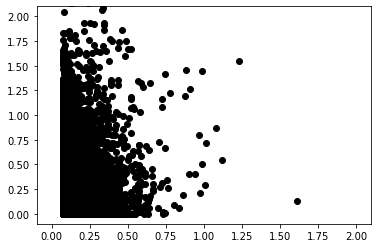

In [ ]:
plt.scatter(mymodel.predict(x), y,  color='black')
plt.xlim(-0.1,2.1) #to keep the same scale as the previous plot
plt.ylim(-0.1,2.1) # same reason as xlim
plt.show()